# Spearman's Correlation

Date published: 2019-03-29

Category: Math

Subcategory: Descriptive Statistics

Tags: correlation, scatter plot, python, pandas


Spearman's correlation is a measure of rank correlation between two numerical variables. It's often denoted as $\rho$ or $r_{s}$.

For example, a Spearman's correlation test can help better identify the relationship between carats in a diamond ring and its price. Does more carats equate to a higher price?

The Spearman's rank correlation is a non-parametric test so there are no requirements of the distributions of the variables to be tested. 

On the other hand, in a Pearson's correlation test, there is assumed to be a *linear* relationship between two variables. However, the Spearman's rank correlation test can identify non-linear relationships between two variables.

### Import Modules

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
sns.set_context("talk")
sns.set_style("darkgrid")

### Data Requirements

The assumption for the Spearman's rank correlation test is that there is a monotonic relationship between the two variables being tested. A **monotonic relationship** exists when one of two following situations exists:

1) As one variable increases, the other variable increases.

2) As one variable increases, the other variable decreases.

Spearman's correlation determines the *strength* (how large or small) and *direction* (positive or negative) of the monotonic relationship between two variables.

### Visual Examples of Monotonic and Non-Monotonic Relationships

Below, as the x-values increase, the y-values almost always increase too so there is a monotonic relationship.

Note there is an observation in which the x-value at $-1$ has a smaller y-value of $-1$ than the previous x-value of $-2$. So there is not a *perfect* positive monotonic relationship. Generally, as long as the far majority of observations follow one of the two conditions outlined above, there's a monotonic relationship between two variables.

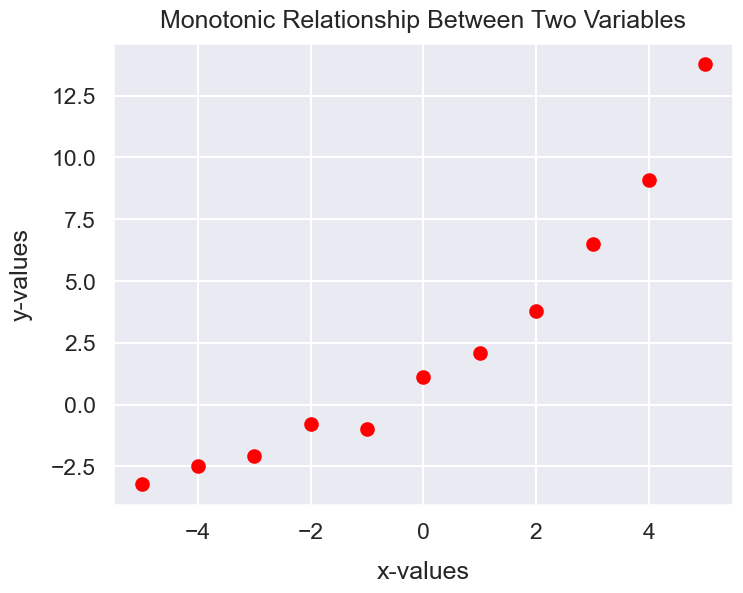

In [4]:
x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y = [-3.2, -2.5, -2.1, -0.8, -1, 1.1, 2.1, 3.8, 6.5, 9.1, 13.8]
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='red')
plt.xlabel("x-values", labelpad=13)
plt.ylabel("y-values", labelpad=13)
plt.title("Monotonic Relationship Between Two Variables", y=1.015);

Below is a monotonic relationship because as the x-values increase, the y-values decrease.

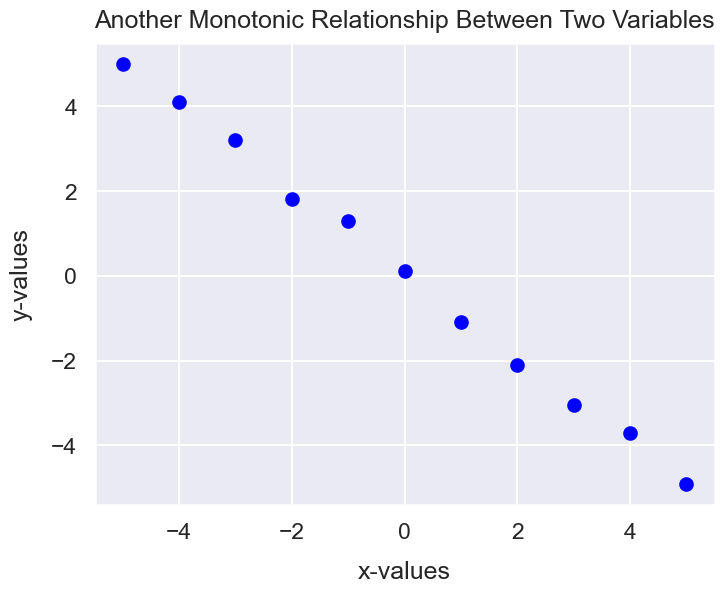

In [5]:
x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y = [5, 4.1, 3.2, 1.8, 1.3, 0.1, -1.1, -2.1, -3.05, -3.7, -4.9]
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.xlabel("x-values", labelpad=13)
plt.ylabel("y-values", labelpad=13)
plt.title("Another Monotonic Relationship Between Two Variables", y=1.015);

Here is an example of a non-monotonic relationship because as the x-values increase, the y-values first decrease and then later increase. 

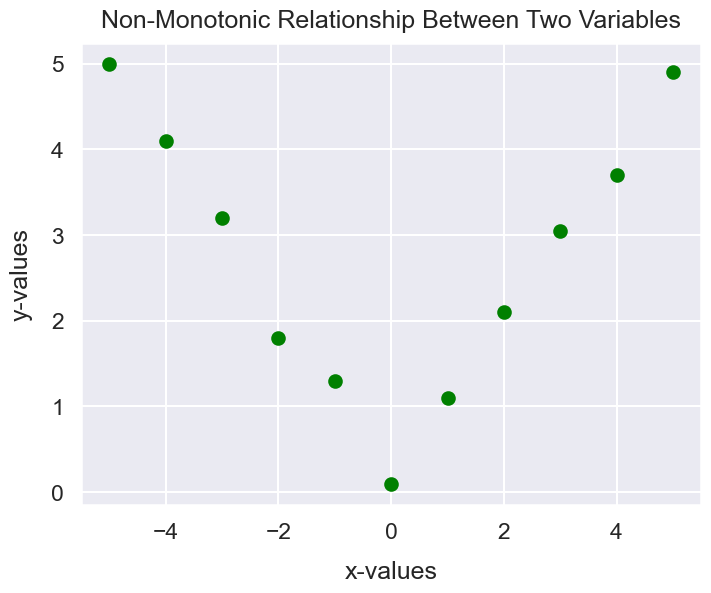

In [6]:
x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y = [5, 4.1, 3.2, 1.8, 1.3, 0.1, 1.1, 2.1, 3.05, 3.7, 4.9]
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='green')
plt.xlabel("x-values", labelpad=13)
plt.ylabel("y-values", labelpad=13)
plt.title("Non-Monotonic Relationship Between Two Variables", y=1.015);

### Explanation of Coefficient Values

If the Pearson's rank correlation value $r_{s}$ is *positive*, as values from one variable increase, values from the other variable increase.

If the rank correlation value is *negative*, as values from one variable decrease, the values from the other variable increase. 

The table below provides some examples of $r_{s}$ and explanations.

Spearman's rank correlation | Interpretation
--- | ---
0 | There's *no* correlation between the two variables
-0.25 | There's a small *negative* correlation between the two variables
-0.75 | There's a large *negative* correlation between the two variables
-1.0 | There's a perfect *negative* correlation between the two variables 
0.25 | There's a small *positive* correlation between the two variables
0.75 | There's a large *positive* correlation between the two variables
1.0 | There's a perfect *positive* correlation between the two variables 

### Example: Diamonds Dataset - Carat and Price

#### Get Diamonds Dataset

Import `diamonds` dataset from Seaborn library and assign to DataFrame `df_diamonds`.

Each row of `df_diamonds` contains details about a specific diamond purchased. We'll just utilize the `price` and `carat` columns below.

In [15]:
df_diamonds = sns.load_dataset('diamonds')

Preview the first few rows of `df_diamonds`.

In [16]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Explanation of carats

`carat` is a unit of measurement in diamonds to characterize its mass. Typically, bigger/heavier diamonds are known to be more expensive.

#### View Distribution of Carats versus Diamond Prices

The plot below has `carats` on the x-axis and `price` on the y-axis. 

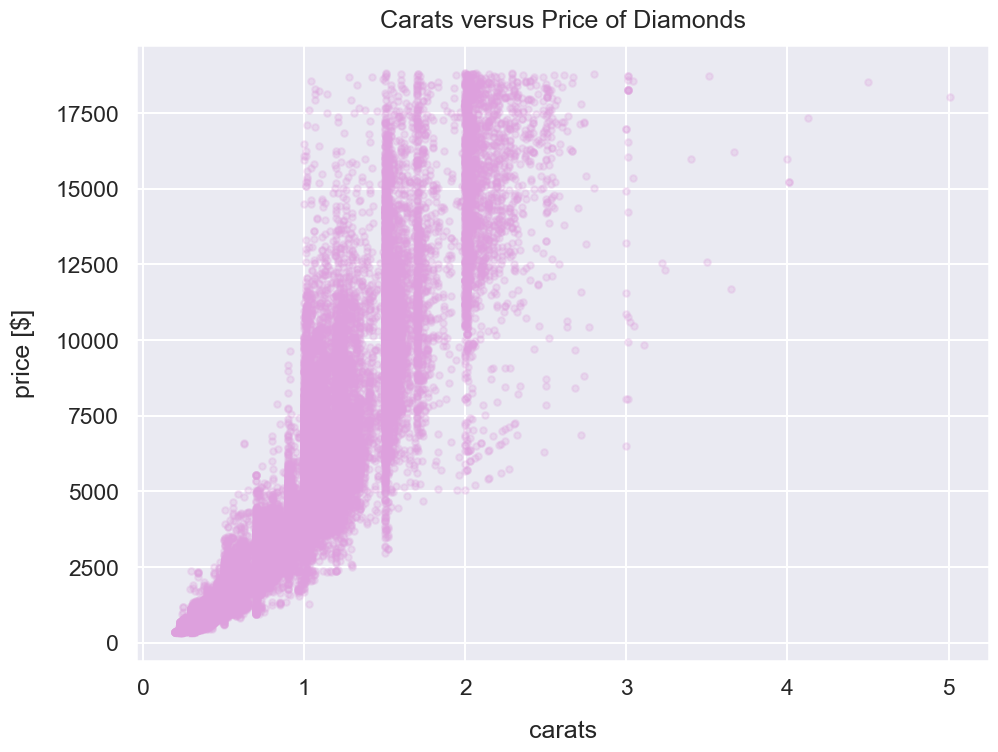

In [12]:
df_diamonds.plot.scatter(x='carat', y='price', s=22, alpha=0.25, c='plum', figsize=(11, 8))
plt.xlabel("carats", labelpad=15)
plt.ylabel("price [$]", labelpad=15)
plt.title("Carats versus Price of Diamonds", y=1.015);

At first glance, it seems there's a positive correlation between the two variables. Generally, as carats increase, price increases. However, this relationship doesn't like like an exact *linear* correlation.

Let's first examine the *linear* relationship between the two variables by calculating the Pearson's correlation coefficient.

In [13]:
round(stats.pearsonr(df_diamonds['carat'], df_diamonds['price'])[0], 2)

0.92

There is a strong positive *linear* relationship between the two variables. 

Next, let's examine the Spearman's rank correlation value.

In [14]:
round(stats.spearmanr(df_diamonds['carat'], df_diamonds['price'])[0], 2)

0.96

The Spearman's rank correlation value of $0.96$ is higher than the Pearson's correlation value of $0.92$. This high value of $0.96$ and also because it's greater than $0.92$ means that the relationship between the two variables can be characterized as something that's *not* linear. This is evident in the visualization. For every unit increase in `carats`, there's an increasingly *greater* unit increase in the `price`. The relationship between the two variables could be characterized closer to <a href='https://en.wikipedia.org/wiki/Exponential_growth'>exponential</a> than linear. 